In [166]:
import pandas as pd
df_train = pd.read_csv("train_merged[961-1120].csv")
df_test = pd.read_csv("test_merged[961-1120].csv")

In [167]:
df_train.head()

,user_id,merchant_id,label,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
0,344706,1825,0,1056812,451,472,2471,1103,0,5,0
1,344706,1825,0,1067615,451,3334,6352,1103,0,5,0
2,344706,1825,0,726039,276,2026,3979,1103,0,5,0
3,344706,1825,0,844714,451,472,2471,1103,0,5,0
4,344706,1825,0,329731,1344,327,1954,808,0,5,0


In [168]:
df_test.head()

,user_id,merchant_id,prob,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
0,284802,2173,NaN,643289,612,141,3614,828,0,0,2
1,284802,2173,NaN,570805,1577,141,3614,828,0,0,2
2,284802,2173,NaN,658620,302,606,376,828,0,0,2
3,284802,2173,NaN,262870,662,606,376,828,3,0,2
4,284802,2173,NaN,934812,612,141,3614,828,3,0,2


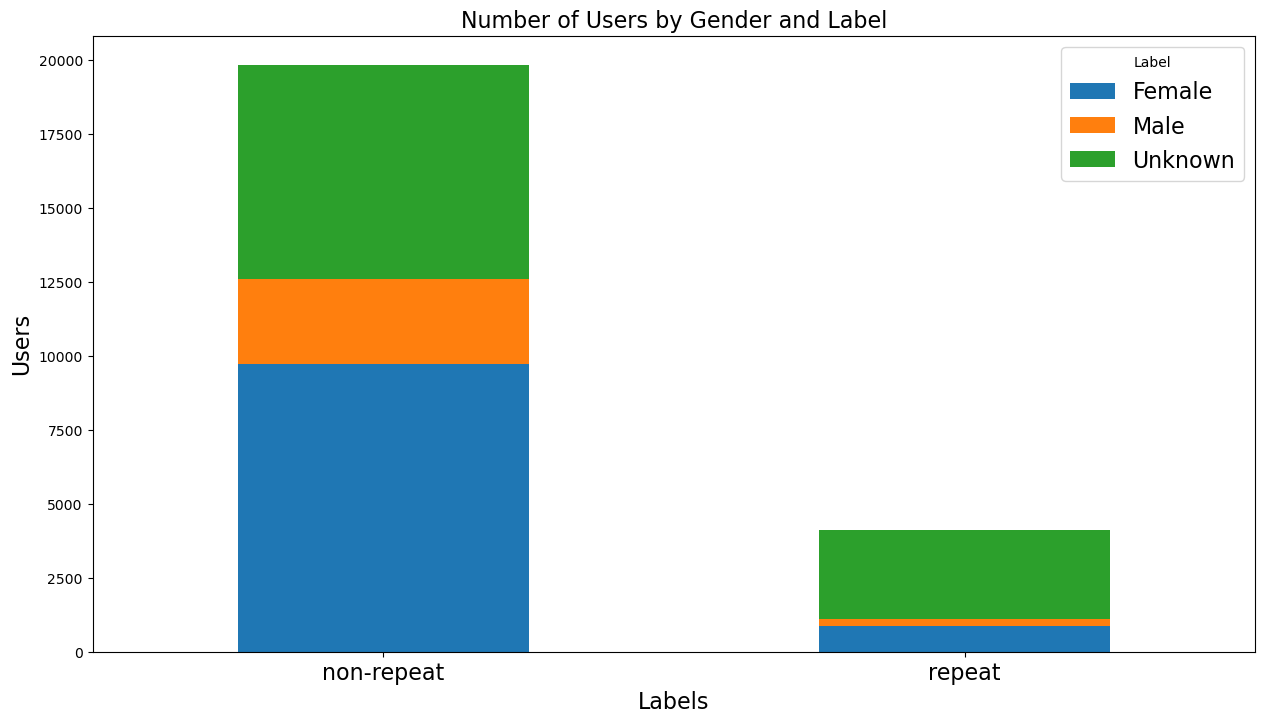

In [169]:
import matplotlib.pyplot as plt

# Group the data by label and age_range, and count the number of users in each group
gen_counts = df_train.groupby(['label', 'gender'])['user_id'].count().unstack()
gen_counts.columns=['Female','Male','Unknown']
# Plot the stacked bar chart
ax = gen_counts.plot(kind='bar', stacked=True, figsize=(15, 8))

# Set the axis labels and title
ax.set_ylabel('Users',fontsize=16)
ax.set_xlabel('Labels',fontsize=16)
ax.set_title('Number of Users by Gender and Label',fontsize=16)
ax.set_xticklabels(['non-repeat','repeat'],fontsize=16, rotation=0)
# Add the legend
ax.legend(title='Label', loc='upper right',fontsize=16)

# Show the plot
plt.show()


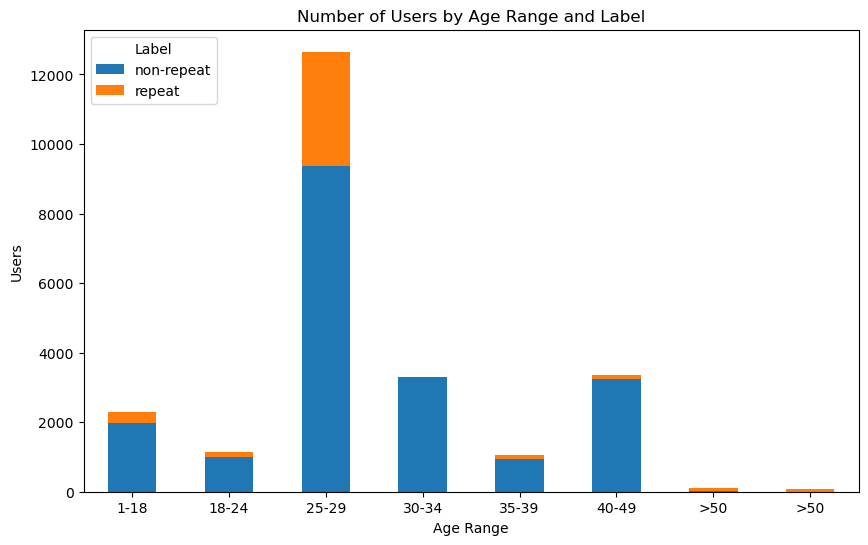

In [170]:
import matplotlib.pyplot as plt

# Group the data by age_range and label, and count the number of users in each group
age_counts = df_train.groupby(['age_range', 'label'])['user_id'].count().unstack()
age_counts.columns = ['non-repeat', 'repeat']
# Plot the stacked bar chart
ax = age_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the axis labels and title
ax.set_ylabel('Users')
ax.set_xlabel('Age Range')
ax.set_title('Number of Users by Age Range and Label')

# Label the x-axis tick labels with the age range labels
ax.set_xticklabels(['1-18', '18-24', '25-29', '30-34', '35-39','40-49','>50','>50'], rotation=0)
# Add the legend
ax.legend(title='Label', loc='upper left')

# Show the plot
plt.show()


In [171]:
df_train.describe()

,user_id,merchant_id,label,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
count,23956.000000,23956.000000,23956.000000,2.395600e+04,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000
mean,116800.737811,2897.869052,0.171815,5.578500e+05,859.816330,2359.881408,4173.031140,912.040199,0.317081,3.345341,0.986016
std,120334.335844,1548.712140,0.377227,3.193599e+05,462.259444,1527.713077,2346.750186,190.905026,0.843046,1.587732,0.932994
min,18306.000000,66.000000,0.000000,2.000000e+00,2.000000,1.000000,9.000000,511.000000,0.000000,0.000000,0.000000
25%,18306.000000,1425.000000,0.000000,2.841750e+05,420.000000,968.000000,2104.000000,728.000000,0.000000,3.000000,0.000000
50%,38787.000000,2952.000000,0.000000,5.610865e+05,786.000000,2206.000000,4190.000000,1003.000000,0.000000,3.000000,1.000000
75%,226434.000000,4499.000000,0.000000,8.278060e+05,1271.000000,3760.000000,6137.000000,1106.000000,0.000000,4.000000,2.000000
max,423042.000000,4992.000000,1.000000,1.112891e+06,1671.000000,4995.000000,8476.000000,1111.000000,3.000000,8.000000,2.000000


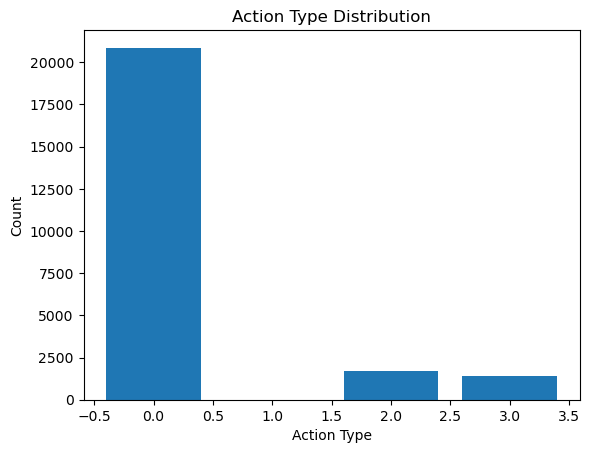

In [172]:
import matplotlib.pyplot as plt
# Create a bar chart to show the distribution of the action types
action_counts = df_train['action_type'].value_counts()
plt.bar(action_counts.index, action_counts.values)
plt.title('Action Type Distribution')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.show()

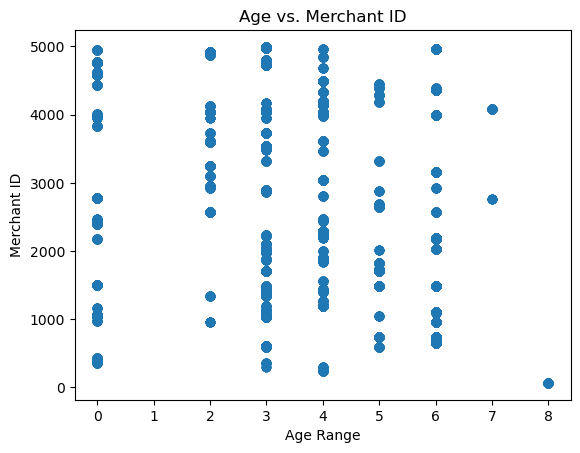

In [173]:
# Create a scatter plot to show the relationship between age and merchant ID
plt.scatter(df_train['age_range'], df_train['merchant_id'])
plt.title('Age vs. Merchant ID')
plt.xlabel('Age Range')
plt.ylabel('Merchant ID')
plt.show()

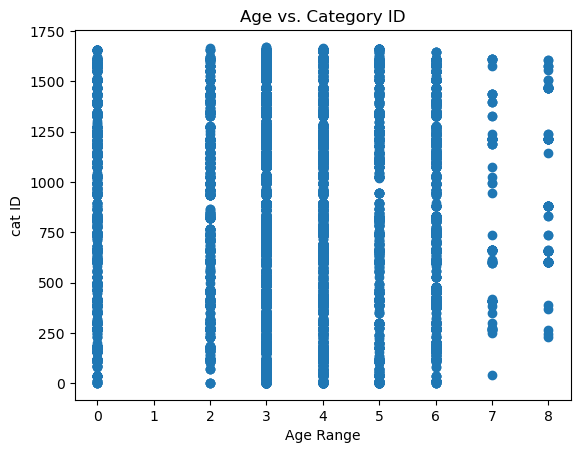

In [174]:
# Create a scatter plot to show the relationship between age and Cat ID
plt.scatter(df_train['age_range'], df_train['cat_id'])
plt.title('Age vs. Category ID')
plt.xlabel('Age Range')
plt.ylabel('cat ID')
plt.show()

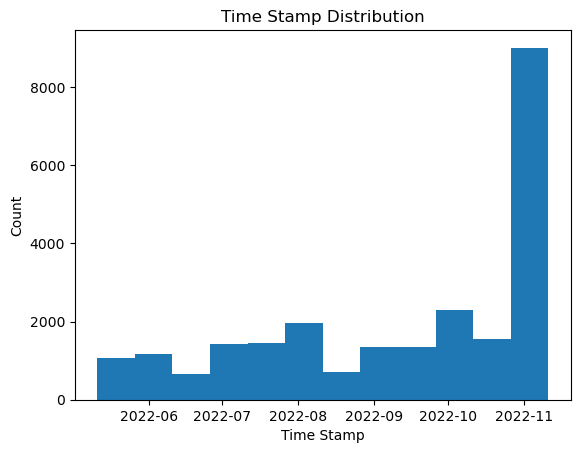

In [175]:
df_train['time_stamp'] = pd.to_datetime(df_train['time_stamp'], format='%m%d').apply(lambda x: x.replace(year=2022))
# Create a histogram to show the distribution of time stamps
plt.hist(df_train['time_stamp'],bins=12)
plt.title('Time Stamp Distribution')
plt.xlabel('Time Stamp')
plt.ylabel('Count')
plt.show()

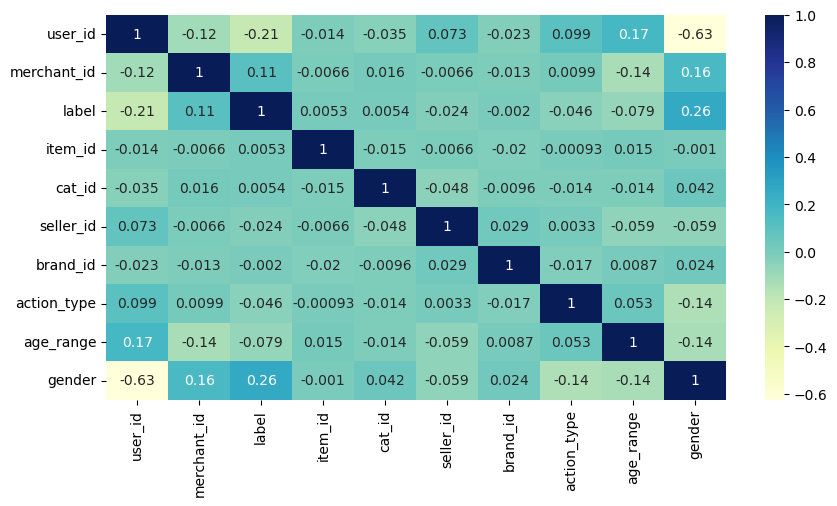

In [176]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 5))
# plotting correlation heatmap
dataplot = sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True,)

# displaying heatmap
plt.show()

<AxesSubplot:xlabel='age_range', ylabel='Count'>

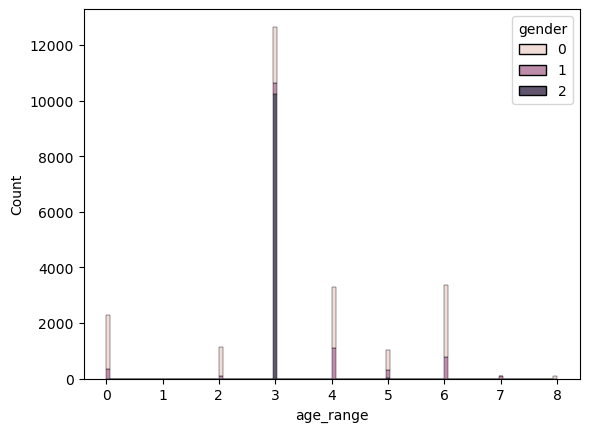

In [177]:
sns.histplot(data=df_train, x="age_range", hue="gender", multiple="stack")

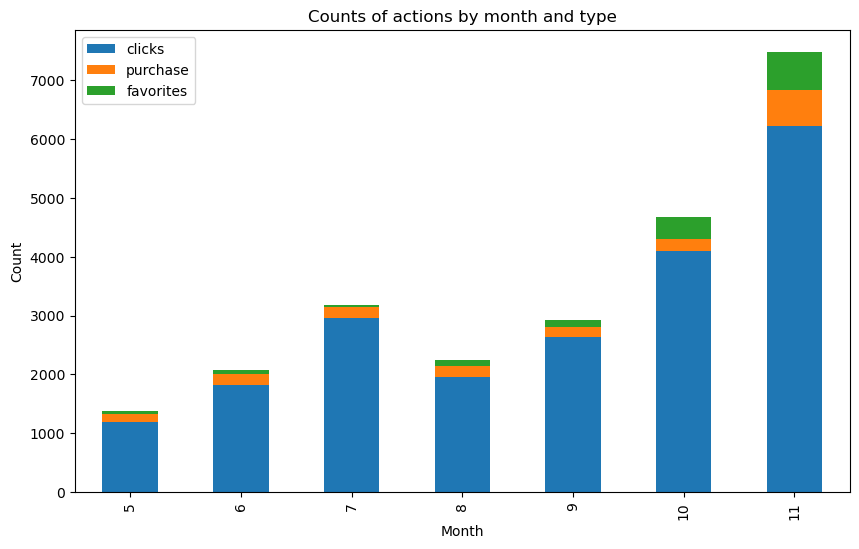

In [178]:
# df_train['month']=df_train['time_stamp']/100
df_train['month'] = df_train['time_stamp'].dt.month
counts = df_train.groupby(['month', 'action_type']).size().unstack()
counts.columns = ['clicks','purchase','favorites']
ax = counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Counts of actions by month and type')

# Show the plot
plt.show()

label             0       1
merchant_id                
66              0.0    90.0
246            68.0     0.0
293             5.0     0.0
296            31.0     0.0
361            90.0     0.0
...             ...     ...
4911          168.0     0.0
4947           72.0     0.0
4966          278.0     0.0
4976          229.0  1444.0
4992         1444.0     0.0

[139 rows x 2 columns]


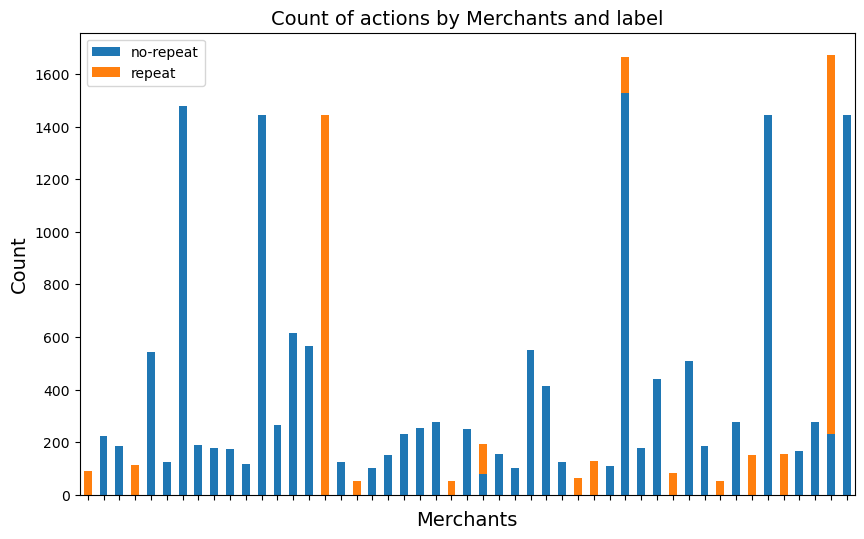

,no-repeat,repeat
merchant_id,,
66,0.0,90.0
606,222.0,0.0
649,186.0,0.0
669,0.0,114.0
742,543.0,0.0


In [188]:
df_train_format1 = pd.read_csv("../EDA/TrainFromat1-group7.csv")
counts = df_train.groupby(['merchant_id', 'label']).size().unstack()
counts=counts.fillna(0)
print(counts)
counts.columns = ['no-repeat','repeat']
counts=counts.loc[(counts['no-repeat'] >= 100) | (counts['repeat'] >= 50)]
ax = counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the axis labels and title
ax.set_xlabel('Merchants',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
ax.set_title('Count of actions by Merchants and label',fontsize=14)
ax.set_xticklabels("")
# Show the plot
plt.show()
counts.head()

label        0    1
brand_id           
9         15.0  6.0
19         1.0  0.0
33         3.0  0.0
42         3.0  0.0
46         2.0  0.0
...        ...  ...
8465       7.0  0.0
8467       0.0  1.0
8471       5.0  0.0
8473       5.0  0.0
8476       3.0  0.0

[2089 rows x 2 columns]


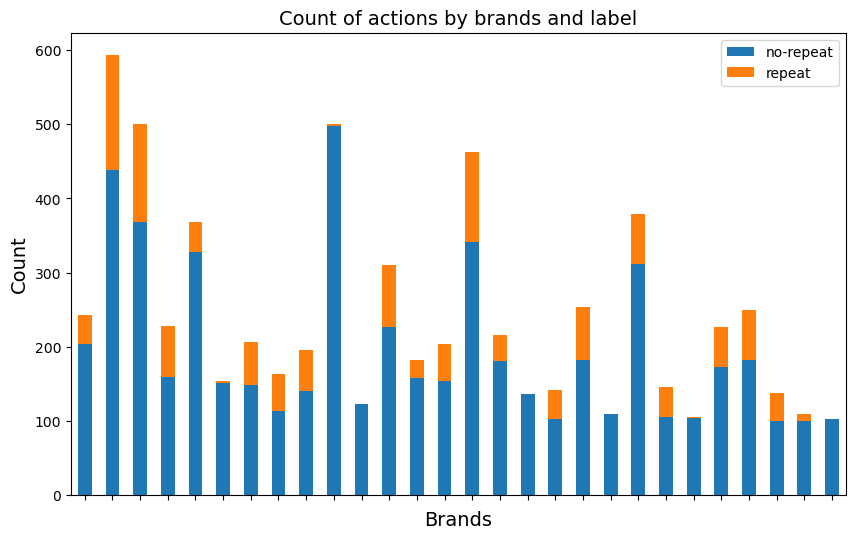

,no-repeat,repeat
brand_id,,
82,203.0,39.0
376,438.0,156.0
1866,368.0,132.0
2045,159.0,69.0
2104,328.0,40.0


In [185]:
# df_train_f=df_train.loc[df_train['action_type']==2]
counts = df_train.groupby(['brand_id', 'label']).size().unstack()
counts=counts.fillna(0)
print(counts)
counts.columns = ['no-repeat','repeat']
counts=counts.loc[(counts['no-repeat'] >= 100) | (counts['repeat'] >= 100)]
ax = counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the axis labels and title
ax.set_xlabel('Brands',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
ax.set_title('Count of actions by brands and label',fontsize=14)
ax.set_xticklabels("")
# Show the plot
plt.show()
counts.head()